In [1]:
%matplotlib inline

In [2]:
import matplotlib
#matplotlib.use('Agg')

import datetime
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

import spectra_mole
from spectra_mole import h

/mole2/spectra_mole2/spectra_mole/vis.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 1

/mole2/spectra_mole2/spectra_mole/__init__.py:299: RuntimeWarning: invalid value encountered in greater
  specSNRcx_region = self.fspec.variables["LDR"][:, ir-2:ir+3, it] * self.fspec.variables["SNRco"][:, ir-2:ir+3, it]
/mole2/spectra_mole2/spectra_mole/__init__.py:307: RuntimeWarning: divide by zero encountered in true_divide
  specLDR = specSNRcx/specSNRco
/mole2/spectra_mole2/spectra_mole/__init__.py:307: RuntimeWarning: invalid value encountered in true_divide
  specLDR = specSNRcx/specSNRco
/mole2/spectra_mole2/spectra_mole/helpers.py:33: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(array)


/colrawi/cloudradar/spectra/D20150617_T0000_0000_Lin_zspc2nc_v1_02_standard.nc4
---- cloud radar ---------------------------------------------------
load cloud radar file  /colrawi/cloudradar/spectra/D20150617_T0000_0000_Lin_zspc2nc_v1_02_standard.nc4
velocity, range, time (256,) (498,) (8430,)
Bin radar reflectivity [mm^6/m^3]. Calculate 10*log10(Z) to get dBz values
time range  [1434499203 1434499214] [1434585538 1434585547] 2015-06-17 00:00:03 2015-06-17 23:59:07
height range  143.903991699 14447.9609375
height resolution [m] 28.7807986837
time resolution [s] 10.2436825248
velocity resolution [m/s] 0.0824692934213
OrderedDict([('convention', 'CF-1.0'), ('location', 'Lindenberg'), ('system', 'MIRA-36'), ('title', 'Cloud Radar Data MIRA-36 2m-Antenna VO Altitude=121 m:Latitude=52.208605 N:Longitude=14.122618 E'), ('institution', 'Unknown'), ('source', '150617_000001.pds.off'), ('reference', 'METEK GmbH www.metek.de'), ('ppar', 'PRF:        5000\nPDR:         192\nSFT:           1\nAVC

/usr/lib/python3/dist-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


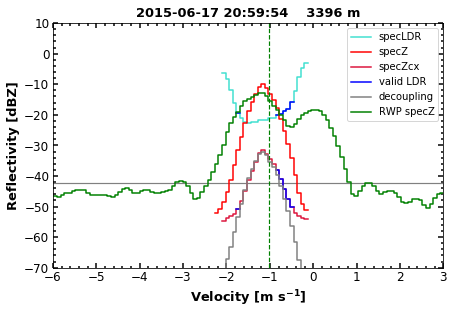

In [3]:
files = {'spec': '/colrawi/cloudradar/spectra/D20150617_T0000_0000_Lin_zspc2nc_v1_02_standard.nc4',
         'mmclx': '/colrawi/cloudradar/mmclx/20150617_0000.mmclx',
         'rwp': '/colrawi/windprofiler/nc/wp_20150617_043156.nc.iop',
         'cloudnet': '/colrawi/cloudnet/20150617_lindenberg_categorize.nc'}

print(files['spec'])

dt = datetime.datetime(2015,6,17,20,59,56)
rg = 3400
#rg = 2750

# issue with the calibration
# dt = datetime.datetime(2015,6,17,19,0,0)
# rg = 9331
cr = spectra_mole.mira(files)
spec = cr.get_spectrum(spectra_mole.h.dt_to_ts(dt), rg, range_average=True)

#spectra_mole.vis.plot_spectrum(None, spec)

rwp = spectra_mole.rwp(files)
spec_rwp = rwp.get_spectrum(spectra_mole.h.dt_to_ts(dt), rg,
                            interp_vel=spec['vel'])
print(spec_rwp.keys())
#spec_rwp['specZ'][72] = h.z2lin(-35)
spectra_mole.vis.plot_spectrum(spec, spectrum_rwp=spec_rwp)

print('vel lists identical ', np.all(spec['vel'] == spec_rwp['vel']))

spectra_mole.check_consistency([spec, spec_rwp])

---- cloudnet advect -------------------------------------------
cloudnet advect time range  [1434499215 1434499245] [1434585524 1434585554] 2015-06-17 00:00:15 2015-06-17 23:59:14
delta t  29.9996525365
adv_tupel  (12.497830873543434, 0.0021998900920152664, (0.17192457211976064, 12.49664829004949))
delta v 0.0824692934213
sigma_b  2.80755752314
None


/mole2/spectra_mole2/spectra_mole/helpers.py:33: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(array)
/usr/lib/python3/dist-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


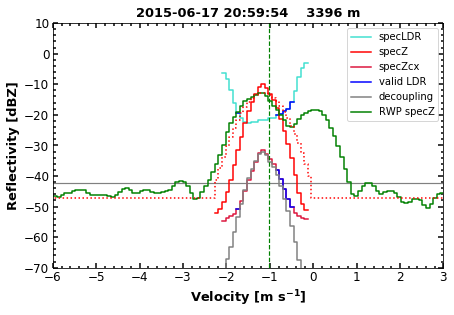

In [4]:
advect = spectra_mole.advection.cloudnet_advect(files['cloudnet'])
adv_tupel = advect.get_pixel(spectra_mole.h.dt_to_ts(dt), rg)
print('adv_tupel ', adv_tupel)

spec_broad = spectra_mole.broaden_spectrum(adv_tupel, spec, cut_thres=spec_rwp['noise_thres'])

#spectra_mole.vis.plot_spectrum(spec_broad, spectrum_rwp=spec_rwp)
spectra_mole.vis.plot_spectrum(spec, spectrum_rwp=spec_rwp, spectrum_b=spec_broad)
print(None)

cal_const 1.45e-15 10
cal_const new  1.45e-14
old lvl, thres  -47.0911298055 -42.3199172583
new lvl, thres  -37.0911298055 -32.3199172583
---- calibration correct
bounds particle peak  (99, 126)
shape of valid deltaZ  (27,)
deltaZ  [         nan   5.25517246   4.16003881   3.85484502   4.55062133
   4.34479939   3.46804994   2.63460868   2.11423727   1.82462057
   1.03508403   0.14015303  -0.1258839   -0.0514637   -0.13042285
  -0.89252028  -2.12515525  -2.79644062  -2.90670178  -2.81258764
  -2.82922988  -2.42743082  -0.28908293   3.45503519   7.96090352
  12.5071523   16.91876893  21.22911455]
deltaZ_mask [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
check calibration: needs correction
correct calibration by:  -1.17673014846  statistics  14.0869664378
({'unsecure_calibration': 0, 'mod_calibration': 1}, 1.176730148458268)
---- calibration bias
bounds particle p

/mole2/spectra_mole2/spectra_mole/helpers.py:33: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(array)
/usr/lib/python3/dist-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


(<matplotlib.figure.Figure at 0x7f603e714588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f603e720470>)

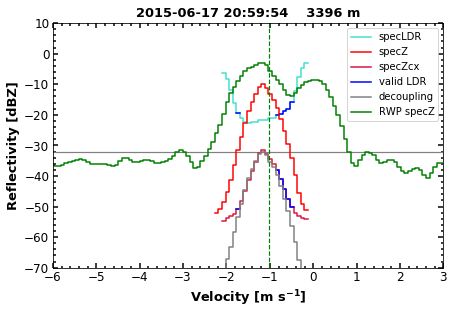

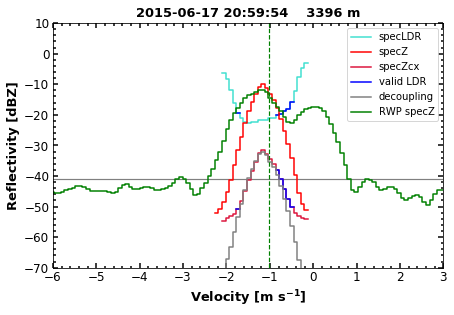

In [5]:
spec_rwp_c = spectra_mole.modify_calibration(spec_rwp, +10)

spectra_mole.vis.plot_spectrum(spec, spectrum_rwp=spec_rwp_c)

print('---- calibration correct')
print(spectra_mole.check_rwp_calibration(spec_rwp, spec_broad))
print('---- calibration bias')
c = spectra_mole.check_rwp_calibration(spec_rwp_c, spec_broad)
print('calibration bias? ', c)
spectra_mole.vis.plot_spectrum(spec, spectrum_rwp=spectra_mole.modify_calibration(spec_rwp_c, c[1]))

In [6]:
print(spectra_mole.estimate_calibration(spec_rwp, spec_broad))

1.10731673663e-15
